In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('social_network.csv')

In [3]:
data.head(3)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
data.shape

(400, 3)

In [5]:
data.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

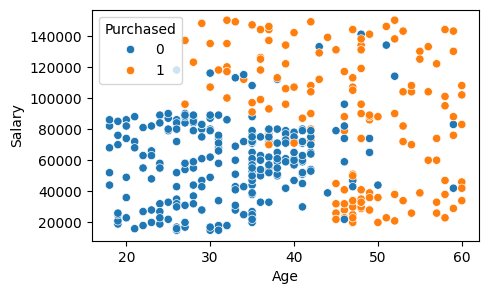

In [6]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Age',y='Salary',data=data,hue='Purchased')
plt.show()

In [40]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [41]:
q1=data['Salary'].quantile(0.25)
q3=data['Salary'].quantile(0.75)

In [42]:
iqr=q3-q1

In [43]:
max_range=q1-(1.5*iqr)
min_range=q3+(1.5*iqr)

In [44]:
min_range,max_range

(np.float64(155500.0), np.float64(-24500.0))

In [51]:
new_data=data[data['Salary']<=min_range]

In [14]:
#from sklearn.preprocessing import StandardScaler # now need to require scaling because age and salary 19 and 19000 big diff between both actual value

In [15]:
#sc=StandardScaler()
#sc.fit(x)
#x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [46]:
#x.head(3)

,Age,Salary
0,19,19000
1,35,20000
2,26,43000


In [52]:
x=new_data.iloc[:,:-1]
y=new_data['Purchased']

In [53]:
from imblearn.under_sampling import RandomUnderSampler

In [54]:
rus=RandomUnderSampler()

In [55]:
x_us,y_us=rus.fit_resample(x,y)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [56]:
y_us.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
len(x_train)

320

In [60]:
len(x_test)

80

# Prunning
# if model overfit, we use prunning , prunning is a concept to handle overfit 
# there are two types of prunning 1) pre prunning 2) post prunning

# Pre Prunning
# Now, Here i use pre prunning concept we put a max depth number directly, its depend on you where you want to stop tree formation

In [61]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree

In [62]:
dc=DecisionTreeClassifier(max_depth=5)                                      
dc.fit(x_train,y_train)                

DecisionTreeClassifier(max_depth=5)

In [63]:
dc.score(x_train,y_train)*100  , dc.score(x_test,y_test)*100  # reduce overfit through pre prunning

(93.4375, 90.0)

In [64]:
dc.predict([[19	,19000]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [65]:
from mlxtend.plotting import plot_decision_regions

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


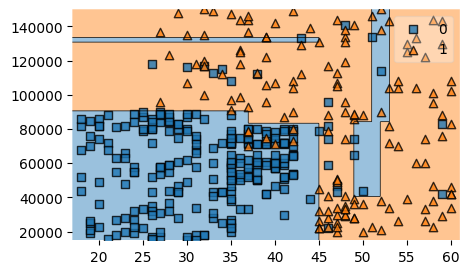

In [66]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dc)           
plt.show()

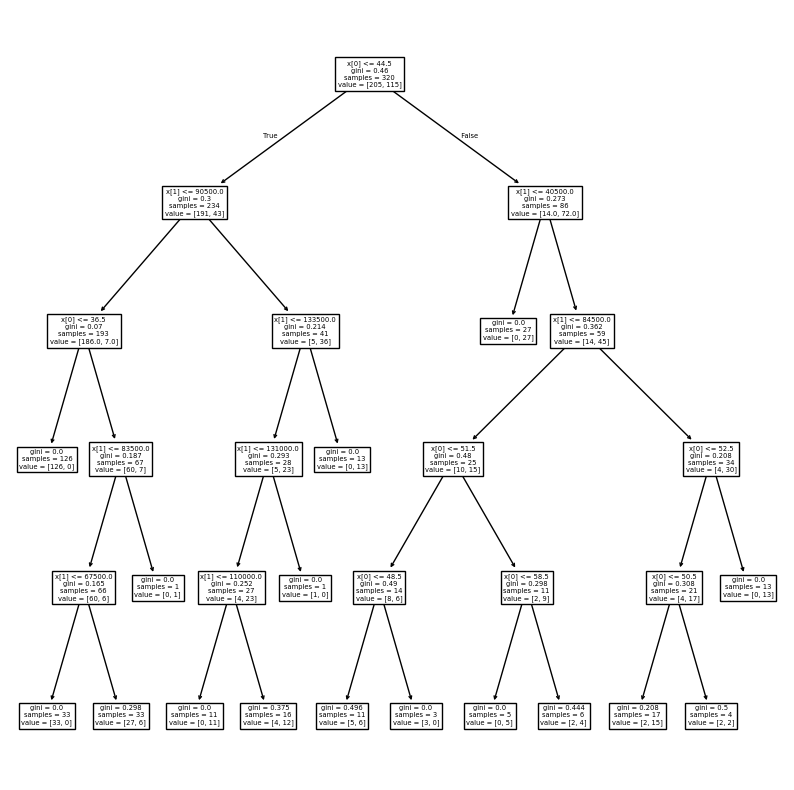

In [67]:
plt.figure(figsize=(10,10))
plot_tree(dc)
plt.show() 

# Post Prunning
# post prunning we cannot put a maxdepth nunber directly. we have to find number through loop where model fit properly

In [32]:
# from sklearn.tree import DecisionTreeClassifier

In [68]:
dc1=DecisionTreeClassifier(max_depth=2)  
dc1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [69]:
dc1.score(x_train,y_train)*100  , dc1.score(x_test,y_test)*100 

(91.875, 91.25)

In [72]:
dc1.predict([[47	,25000]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [36]:
for i in range (1,11):
     pr=DecisionTreeClassifier(max_depth=i)
     pr.fit(x_train,y_train)
     print(pr.score (x_train,y_train) , pr.score (x_test,y_test) , i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10


C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


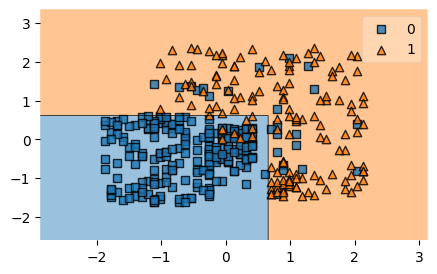

In [37]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dc1)           
plt.show()

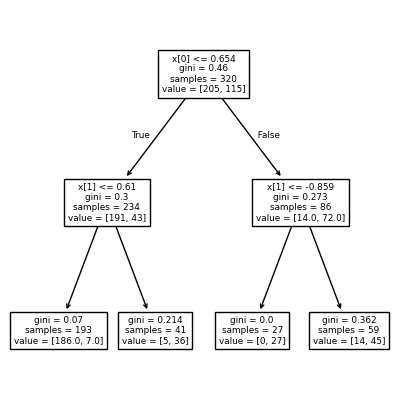

In [38]:
plt.figure(figsize=(5,5))
plot_tree(dc1)
plt.show()                                    # tree post prunning